In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
import csv
from pathlib import Path
import glob
import seaborn as sns

In [2]:
data = {}

for fname in glob.glob("./bias_dwave_s4/**/data*.csv", recursive=True):
    param = fname.split("/")
    hz = param[2][3:]
    ta = param[3][3:]
    E = param[4][2:5]
    if 'new' in param[5]: 
        fieldnames = ["D", "which", "chi", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
        dtypes =     [int, str, int, float, float, float, float, float, float]
        sf = param[5][12:18]
        ind = (hz, ta, E, sf)
    else:
        fieldnames = ["D", "which", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
        dtypes =     [int, str, float, float, float, float, float, float]
        sf = param[5][8:11]
        ind = (hz, ta, E, sf)
    
    with open(fname, 'r', newline='') as csvfile:
        csvfile.readline()
        data[ind] = []
        for x in csv.DictReader(csvfile, fieldnames=fieldnames, delimiter=";"):
            for fn, typ in zip(fieldnames, dtypes):
                x[fn] = typ(x[fn])
            x["Eng"] = (-2 * x["Ezz"] - float(hz) * x["Ez"])   
            data[ind].append(x)

In [3]:
def get_sf(hz, ta, E):
    sfs = []
    for ind in data:
        #print(ind[:3], (hz, ta, E))
        if ind[:3] == (hz, ta, E):
            sfs.append(ind[3])
    sfs.sort()
    return sfs

In [15]:
def plot_ax(ax, hz, E, val='Ezz'):
    Dline = {8: '--x', 12:'-+', 16: ":o"}
    
    colors = sns.color_palette("Paired")
    tas = ['0.1000', '0.2000', '0.4000', '0.8000', '1.0000', '2.0000', '4.0000'] #'5.4000', '6.3000', '7.2000', '8.3000', '9.6000']
    for ii, ta in enumerate(tas):
        sfs = get_sf(hz, ta, E)
        Ezz = {}
        for sf in sfs:
            for x in data[hz, ta, E, sf]:
                if x['D'] in Ezz:
                    Ezz[x['D']].append(x[val])
                else:
                    Ezz[x['D']] = [x[val]]
        sff = [float(sf) for sf in sfs]
        for k, v in Ezz.items():
            line, = ax.plot(sff[:len(v)], v, Dline[k], color=colors[ii])
            if k == 12:
                line.set_label(f"{ta=}")
    ax.set_xlabel("s")
    ax.set_ylabel(val)
    ax.set_title(f"{hz=} {E=}")
    ax.set_ylim([0, 0.8])
    ax.set_xlim([0.3, 0.6])


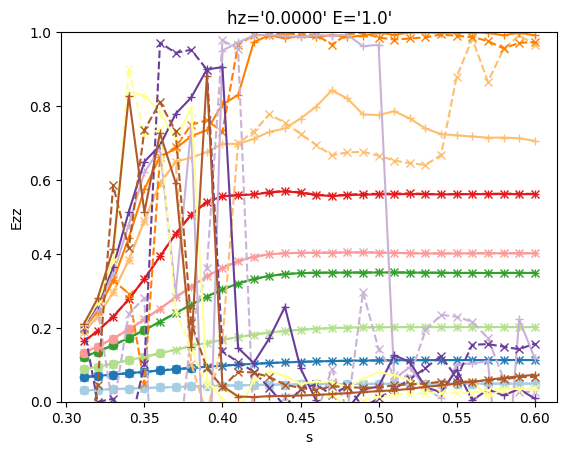

In [5]:
ax = plt.gca()
plot_ax(ax, "0.0000", "1.0", val='Ezz')

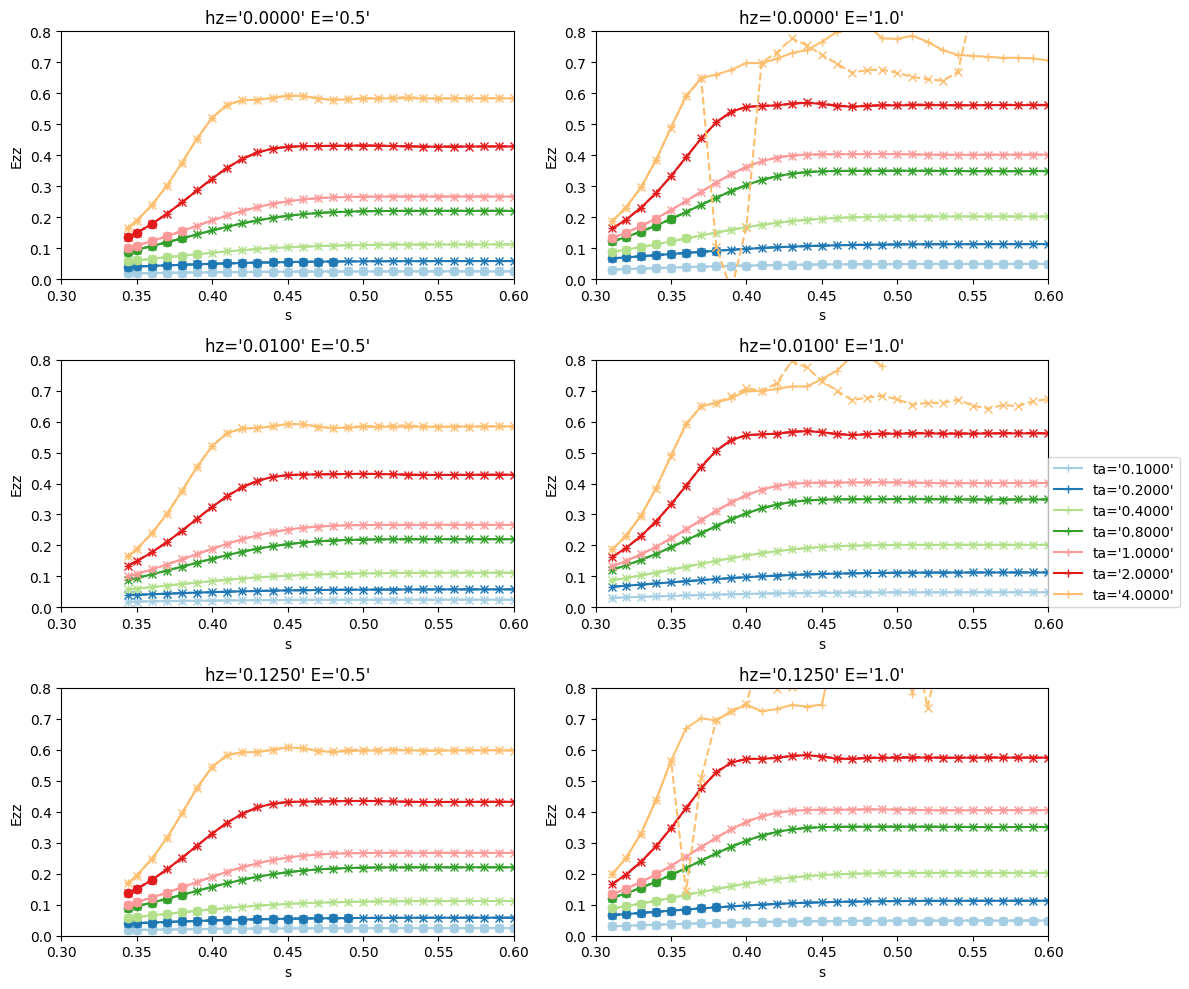

In [16]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(12, 10)

for ii, hz in enumerate(['0.0000', "0.0100", "0.1250"]):
    for jj, E in enumerate(['0.5', "1.0"]):
        plot_ax(axs[ii, jj], hz, E, val='Ezz')
axs[1, 1].legend(loc=(1, 0))

fig.tight_layout()


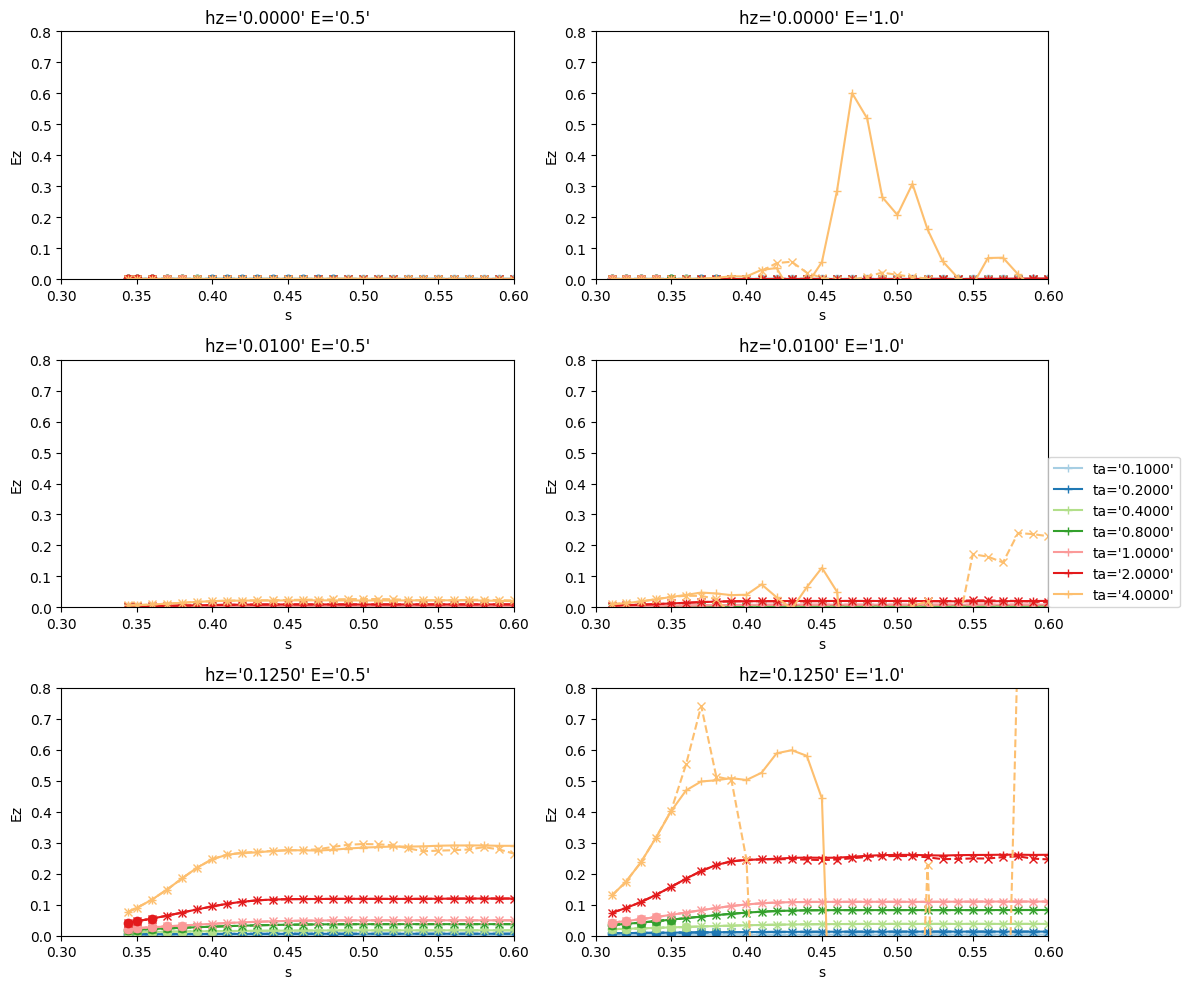

In [17]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(12, 10)

for ii, hz in enumerate(['0.0000', "0.0100", "0.1250"]):
    for jj, E in enumerate(['0.5', "1.0"]):
        plot_ax(axs[ii, jj], hz, E, val='Ez')
axs[1, 1].legend(loc=(1, 0))

fig.tight_layout()
